                AÑO     EDAD_TIPO     EDAD_CANT    COD_COMUNA  CAPITULO_DIAG2  \
count  58043.000000  58043.000000  58043.000000  58043.000000             0.0   
mean    2021.028324      1.000569     73.829799  10226.000741             NaN   
std        0.910008      0.025242     14.623037   3854.793973             NaN   
min     2020.000000      1.000000      1.000000   1101.000000             NaN   
25%     2020.000000      1.000000     65.000000   7102.000000             NaN   
50%     2021.000000      1.000000     76.000000  13103.000000             NaN   
75%     2022.000000      1.000000     85.000000  13124.000000             NaN   
max     2024.000000      3.000000    126.000000  16305.000000             NaN   

       GLOSA_CAPITULO_DIAG2  CODIGO_GRUPO_DIAG2  GLOSA_GRUPO_DIAG2  \
count                   0.0                 0.0                0.0   
mean                    NaN                 NaN                NaN   
std                     NaN                 NaN             

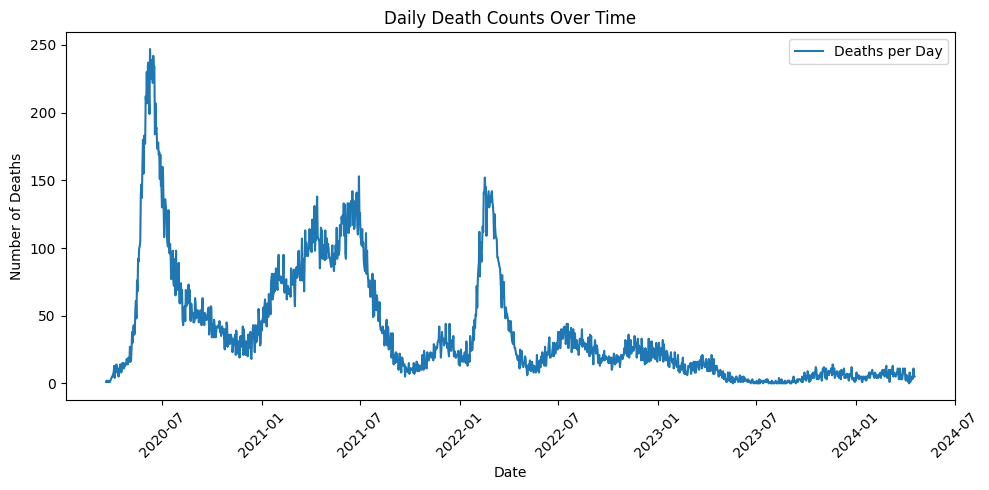

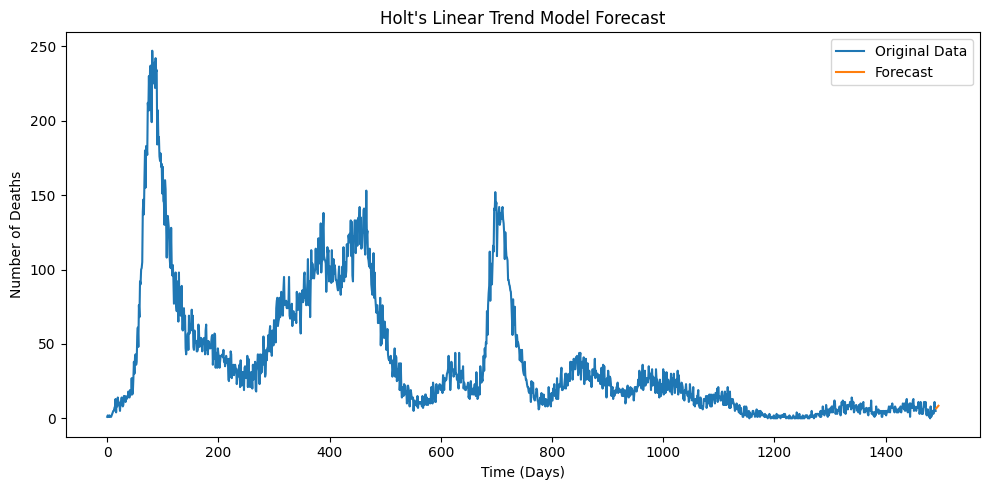

                AÑO     EDAD_TIPO     EDAD_CANT    COD_COMUNA  CAPITULO_DIAG2  \
count  58043.000000  58043.000000  58043.000000  58043.000000             0.0   
mean    2021.028324      1.000569     73.829799  10226.000741             NaN   
std        0.910008      0.025242     14.623037   3854.793973             NaN   
min     2020.000000      1.000000      1.000000   1101.000000             NaN   
25%     2020.000000      1.000000     65.000000   7102.000000             NaN   
50%     2021.000000      1.000000     76.000000  13103.000000             NaN   
75%     2022.000000      1.000000     85.000000  13124.000000             NaN   
max     2024.000000      3.000000    126.000000  16305.000000             NaN   

       GLOSA_CAPITULO_DIAG2  CODIGO_GRUPO_DIAG2  GLOSA_GRUPO_DIAG2  \
count                   0.0                 0.0                0.0   
mean                    NaN                 NaN                NaN   
std                     NaN                 NaN             

/tmp/ipykernel_4695/1664033160.py:93: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(min_date, max_date, freq="M")
/tmp/ipykernel_4695/1664033160.py:94: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  death_counts = df.set_index('FECHA_DEF').resample("M").size().reset_index(name="deaths")


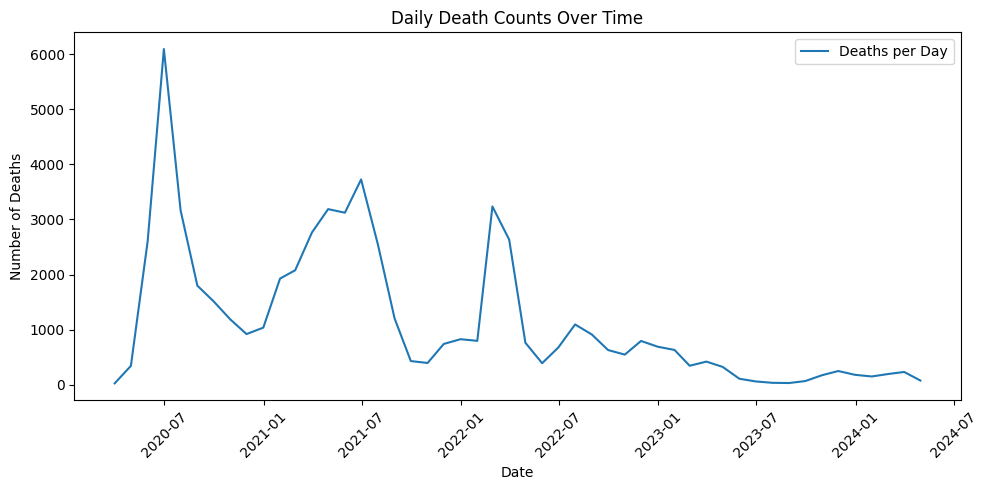

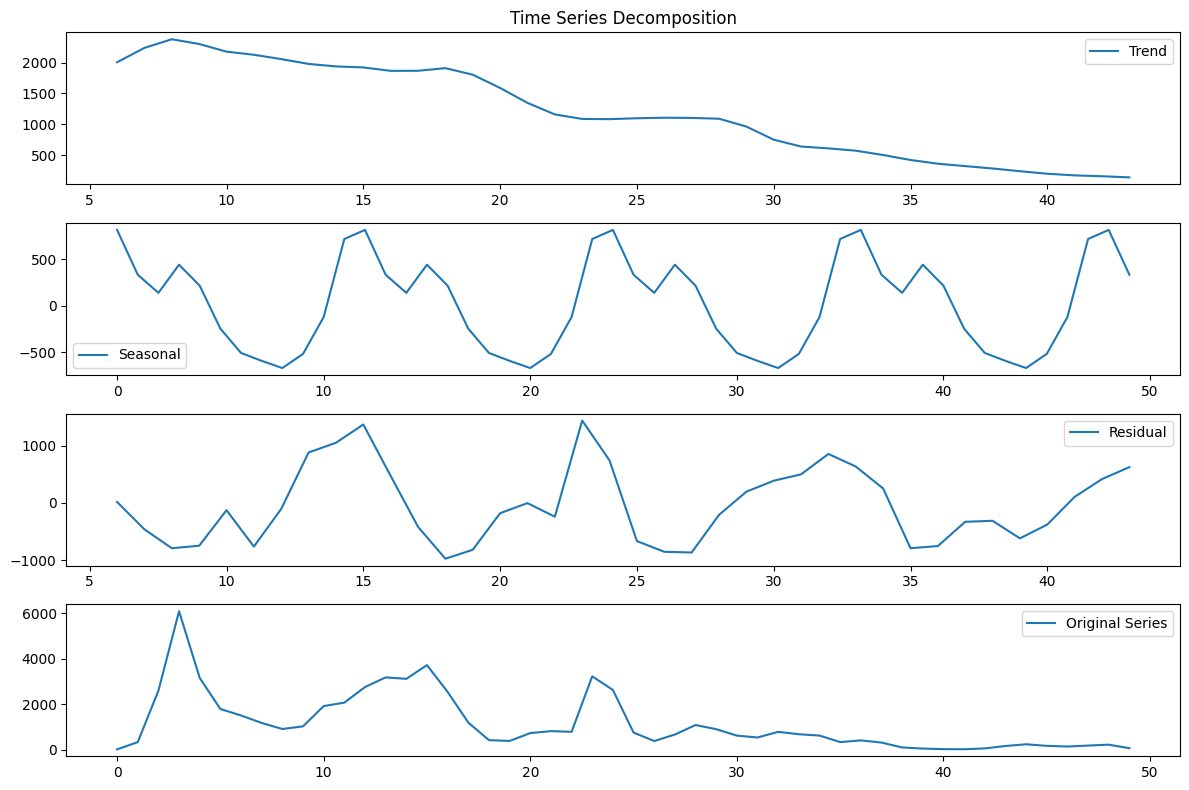

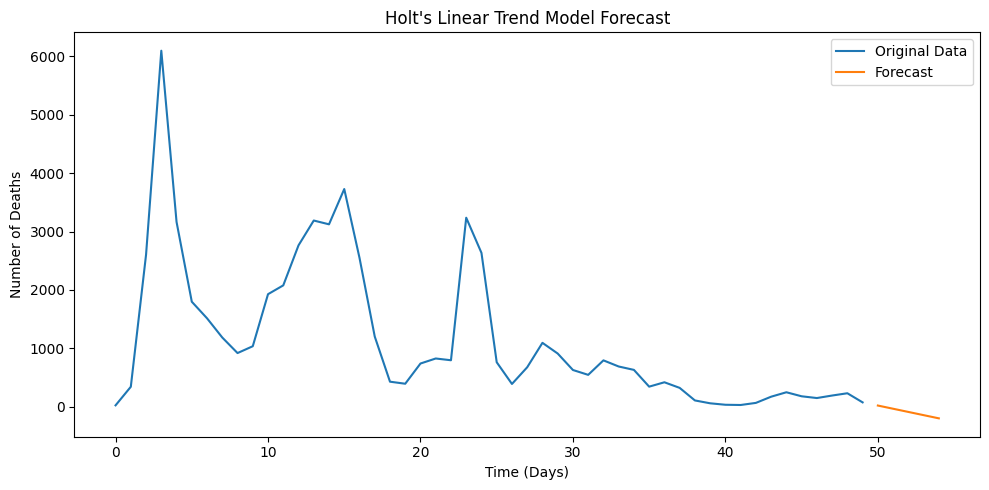

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose


file = 'covid.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file, delimiter=";")

# Display a summary and the first few rows
print(df.describe())
print(df.head())

# Convert the 'FECHA_DEF' column to datetime
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'], format="%Y-%m-%d")

# Group by 'FECHA_DEF' and count the number of deaths for each day
death_counts = df.groupby('FECHA_DEF').size().reset_index(name="deaths")

# Fill missing dates with 0 deaths
min_date = death_counts['FECHA_DEF'].min()
max_date = death_counts['FECHA_DEF'].max()

# Create a date range and reindex the DataFrame
date_range = pd.date_range(min_date, max_date, freq="D")
death_counts = death_counts.set_index('FECHA_DEF').reindex(date_range, fill_value=0).reset_index()
death_counts.columns = ["date", "deaths"]

print(death_counts)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(death_counts["date"], death_counts["deaths"], label="Deaths per Day")
plt.title("Daily Death Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Applying Holt's method for time series forecasting
# Note: For demonstration, we'll skip using `ausair` data and use `death_counts`

# Converting 'deaths' to a time series
time_series = death_counts["deaths"]

# Holt's linear trend model with additive seasonal components
model = ExponentialSmoothing(time_series, trend="add", seasonal=None, seasonal_periods=None)

# Fitting the model
fitted_model = model.fit()

# Forecasting for 5 periods ahead
forecast = fitted_model.forecast(5)

# Plotting the forecasted data
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Original Data")
plt.plot(range(len(time_series), len(time_series) + len(forecast)), forecast, label="Forecast")
plt.title("Holt's Linear Trend Model Forecast")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Deaths")
plt.legend()
plt.tight_layout()
plt.show()
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read the CSV file into a DataFrame
df = pd.read_csv(file, delimiter=";")

# Display a summary and the first few rows
print(df.describe())
print(df.head())

# Convert the 'FECHA_DEF' column to datetime
df['FECHA_DEF'] = pd.to_datetime(df['FECHA_DEF'], format="%Y-%m-%d")

# Group by 'FECHA_DEF' and count the number of deaths for each day
death_counts = df.groupby('FECHA_DEF').size().reset_index(name="deaths")

# Fill missing dates with 0 deaths
min_date = death_counts['FECHA_DEF'].min()
max_date = death_counts['FECHA_DEF'].max()

# Create a date range and reindex the DataFrame
date_range = pd.date_range(min_date, max_date, freq="M")
death_counts = df.set_index('FECHA_DEF').resample("M").size().reset_index(name="deaths")
death_counts.columns = ["date", "deaths"]

print(death_counts)

# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(death_counts["date"], death_counts["deaths"], label="Deaths per Day")
plt.title("Daily Death Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Applying Holt's method for time series forecasting
# Note: For demonstration, we'll skip using `ausair` data and use `death_counts`

# Converting 'deaths' to a time series
time_series = death_counts["deaths"]

# Holt's linear trend model with additive seasonal components
model = ExponentialSmoothing(time_series, trend="add", seasonal=None, seasonal_periods=None)

# Fitting the model
fitted_model = model.fit()

# Forecasting for 5 periods ahead
forecast = fitted_model.forecast(5)
decomposition = seasonal_decompose(time_series, model="additive", period=12)
plt.figure(figsize=(12, 8))

# Trend subplot
plt.subplot(4, 1, 1)
plt.plot(decomposition.trend, label="Trend")
plt.legend()
plt.title("Time Series Decomposition")

# Seasonal subplot
plt.subplot(4, 1, 2)
plt.plot(decomposition.seasonal, label="Seasonal")
plt.legend()

# Residual subplot
plt.subplot(4, 1, 3)
plt.plot(decomposition.resid, label="Residual")
plt.legend()

# Original series subplot
plt.subplot(4, 1, 4)
plt.plot(time_series, label="Original Series")
plt.legend()

plt.tight_layout()
plt.show()


# Plotting the forecasted data
plt.figure(figsize=(10, 5))
plt.plot(time_series, label="Original Data")
plt.plot(range(len(time_series), len(time_series) + len(forecast)), forecast, label="Forecast")
plt.title("Holt's Linear Trend Model Forecast")
plt.xlabel("Time (Days)")
plt.ylabel("Number of Deaths")
plt.legend()
plt.tight_layout()
plt.show()


0        NaN
1        NaN
2     2579.0
3     5753.0
4      561.0
5    -4297.0
6    -1650.0
7     -613.0
8     -595.0
9     -149.0
10    1008.0
11    1042.0
12     836.0
13    1110.0
14     360.0
15     539.0
16    -574.0
17   -2525.0
18   -2120.0
19    -808.0
20     311.0
21     432.0
22      56.0
23    2410.0
24    1838.0
25   -2474.0
26   -2244.0
27     -86.0
28     704.0
29     235.0
30    -465.0
31    -365.0
32     165.0
33     143.0
34    -163.0
35    -345.0
36    -212.0
37     -21.0
38    -311.0
39    -264.0
40     -74.0
41     -29.0
42      32.0
43     142.0
44     182.0
45       7.0
46     -99.0
47      13.0
48      82.0
49    -117.0
Name: deaths, dtype: float64

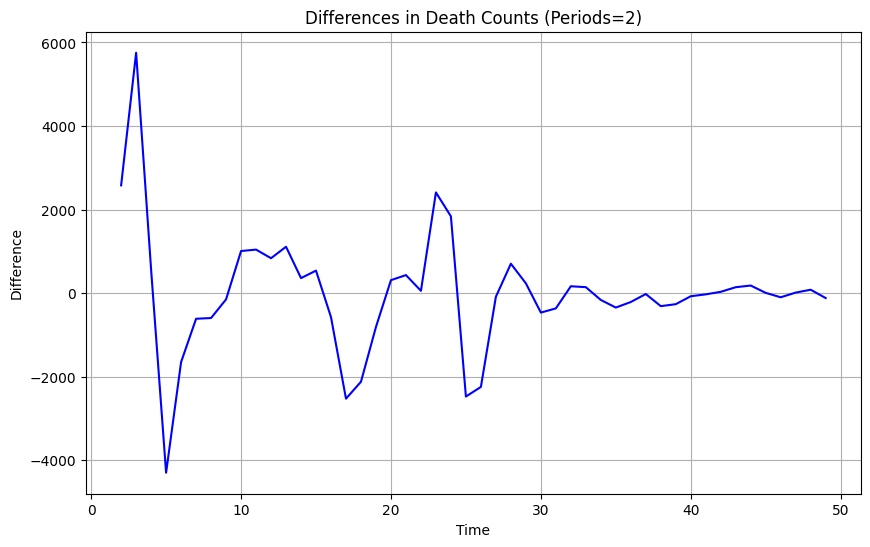

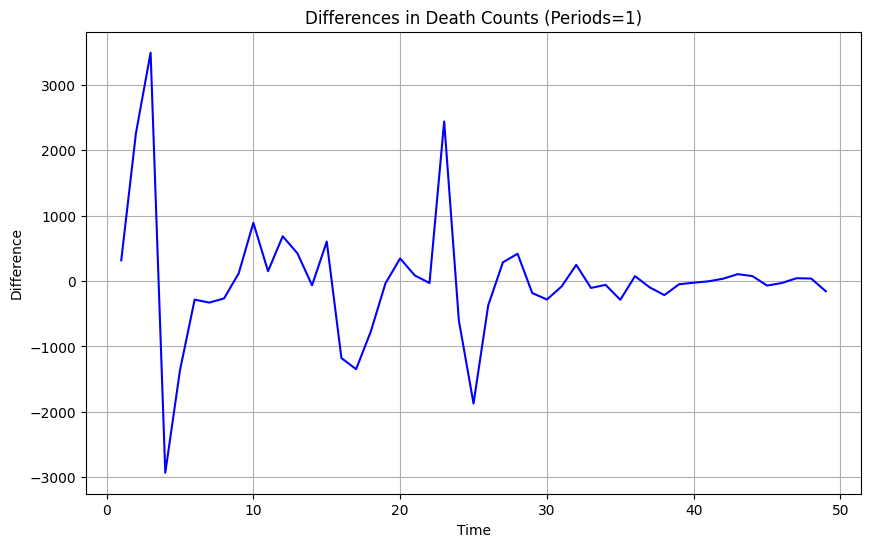

In [8]:
diff = death_counts['deaths'].diff(periods = 2)
display(diff)
plt.figure(figsize=(10, 6))
plt.plot(diff, color='blue')
plt.title('Differences in Death Counts (Periods=2)')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

diff = death_counts['deaths'].diff(periods = 1)
plt.figure(figsize=(10, 6))
plt.plot(diff, color='blue')
plt.title('Differences in Death Counts (Periods=1)')
plt.xlabel('Time')
plt.ylabel('Difference')
plt.grid(True)
plt.show()